In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kunet3plus2d',
           discriminator='cnnplus',
           filter_num_down=[16, 32, 64, 128, 256], 
           filter_num_skip=[16, 16, 16, 16], 
           filter_num_aggregate=32, 
           stack_num_down=2, 
           stack_num_up=1, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=False, 
           pool=False, 
           unpool=False, 
           deep_supervision=False, 
           optimizer=None, 
           loss=None,
           metric=None
          )

KUNet3Plus2D: None, None, None
*** GP2  KUNet3Plus2D ***
Working directory: /tmp/tmpz6u7z5gaGP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrasound_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Breast_Ultrasound_Images/Breast_Ultrassound_masks.npy')

In [5]:
images.shape

(1457, 512, 512, 1)

In [6]:
masks.shape

(1457, 512, 512, 1)

In [7]:
R.run(images=images, masks=masks, runs=8, use_multi_gpu=True)

Number of devices: 3
Weights OK!
******
Loop 1
Epoch 1/100
2/2 [==============================] - 22s 7s/step - loss: 0.6770 - dice_coeff: 0.0494 - val_loss: 0.6924 - val_dice_coeff: 0.0779
Epoch 2/100
2/2 [==============================] - 2s 886ms/step - loss: 0.6541 - dice_coeff: 0.0587 - val_loss: 0.6921 - val_dice_coeff: 0.0779
Epoch 3/100
2/2 [==============================] - 2s 820ms/step - loss: 0.6343 - dice_coeff: 0.0583 - val_loss: 0.6917 - val_dice_coeff: 0.0779
Epoch 4/100
2/2 [==============================] - 2s 819ms/step - loss: 0.6162 - dice_coeff: 0.0719 - val_loss: 0.6912 - val_dice_coeff: 0.0779
Epoch 5/100
2/2 [==============================] - 2s 832ms/step - loss: 0.5978 - dice_coeff: 0.0793 - val_loss: 0.6906 - val_dice_coeff: 0.0779
Epoch 6/100
2/2 [==============================] - 2s 832ms/step - loss: 0.5803 - dice_coeff: 0.0667 - val_loss: 0.6900 - val_dice_coeff: 0.0779
Epoch 7/100
2/2 [==============================] - 2s 822ms/step - loss: 0.5631 - dic

Epoch 57/100
2/2 [==============================] - 2s 890ms/step - loss: 0.2065 - dice_coeff: 0.1026 - val_loss: 0.6017 - val_dice_coeff: 0.0772
Epoch 58/100
2/2 [==============================] - 2s 893ms/step - loss: 0.2038 - dice_coeff: 0.0643 - val_loss: 0.6001 - val_dice_coeff: 0.0772
Epoch 59/100
2/2 [==============================] - 2s 822ms/step - loss: 0.2005 - dice_coeff: 0.0866 - val_loss: 0.5979 - val_dice_coeff: 0.0771
Epoch 60/100
2/2 [==============================] - 2s 901ms/step - loss: 0.1970 - dice_coeff: 0.1024 - val_loss: 0.5959 - val_dice_coeff: 0.0771
Epoch 61/100
2/2 [==============================] - 2s 898ms/step - loss: 0.1957 - dice_coeff: 0.1183 - val_loss: 0.5942 - val_dice_coeff: 0.0771
Epoch 62/100
2/2 [==============================] - 2s 852ms/step - loss: 0.1921 - dice_coeff: 0.1171 - val_loss: 0.5923 - val_dice_coeff: 0.0771
Epoch 63/100
2/2 [==============================] - 2s 853ms/step - loss: 0.1887 - dice_coeff: 0.0937 - val_loss: 0.5905 - v

Testing the classifier...
Testing the discriminator...
3/3 [==============================] - 0s 29ms/step - loss: 1.7174e-05 - accuracy: 1.0000
Replacing 14 from 43 !
D_relabeled_ 14
point ids 14
Removed: 14 Filled: 14
TOOK 272.2910096645355 seconds
==== DONE LOOP 3 ====
******
Loop 4
Epoch 1/100
2/2 [==============================] - 10s 10s/step - loss: 0.1337 - dice_coeff: 0.2804 - val_loss: 0.5188 - val_dice_coeff: 0.0769
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 0.1301 - dice_coeff: 0.3023 - val_loss: 0.5162 - val_dice_coeff: 0.0769
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.1287 - dice_coeff: 0.3057 - val_loss: 0.5135 - val_dice_coeff: 0.0769
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 0.1283 - dice_coeff: 0.2955 - val_loss: 0.5109 - val_dice_coeff: 0.0768
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.1273 - dice_coeff: 0.3072 - val_loss: 0.5083 - val_dice_coeff: 0.0768
E

3/3 [==============================] - 3s 980ms/step - loss: 0.1332 - dice_coeff: 0.3170 - val_loss: 0.3793 - val_dice_coeff: 0.0755
Epoch 8/100
3/3 [==============================] - 3s 989ms/step - loss: 0.1333 - dice_coeff: 0.3324 - val_loss: 0.3711 - val_dice_coeff: 0.0754
Epoch 9/100
3/3 [==============================] - 3s 1s/step - loss: 0.1339 - dice_coeff: 0.3105 - val_loss: 0.3608 - val_dice_coeff: 0.0752
Model saved to: /tmp/tmpz6u7z5gaGP2/kunet3plus2d_7kunet3plus2d_model
History saved to: /tmp/tmpz6u7z5gaGP2/kunet3plus2d_history_7.pkl
Testing the classifier...
Testing the discriminator...
3/3 [==============================] - 0s 30ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Replacing 14 from 44 !
D_relabeled_ 14
point ids 14
Removed: 14 Filled: 14
TOOK 152.74798393249512 seconds
==== DONE LOOP 8 ====


In [8]:
R.classifier_scores

[[0.5832379460334778, 0.10355496406555176],
 [0.5663158893585205, 0.09793286770582199],
 [0.5278539657592773, 0.09460997581481934],
 [0.5091996192932129, 0.0949440747499466],
 [0.47478431463241577, 0.09051359444856644],
 [0.46031516790390015, 0.08686376363039017],
 [0.41325777769088745, 0.08207861334085464],
 [0.3710896968841553, 0.08029977232217789]]

In [9]:
R.discriminator_scores

[[0.0, 1.0],
 [0.2590228021144867, 0.9885057210922241],
 [1.717385384836234e-05, 1.0],
 [0.0, 1.0],
 [7.5556586125458125e-06, 1.0],
 [0.0, 1.0],
 [7.5556586125458125e-06, 1.0],
 [0.0, 1.0]]

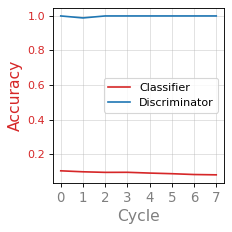

In [10]:
R.plot()